# **[AIO 2022] - Basic RNN/LSTM**
**Họ và tên: Võ Phan Anh Quân**

# **Phần I: Lý thuyết**

## **Recurrent Neural Network**

**Recurrent Neural Network (RNN)** là một trong các loại mạng nơ-ron thường được dùng để giải quyết các bài toán có dữ liệu dạng sequence (dạng chuỗi thời gian) như time series, text... Với cơ chế sử dụng output của thời điểm t − 1 để dự đoán cho input của thời điểm t hiện tại, RNN duyệt qua từng thời điểm t trong mẫu dữ liệu, thực hiện tính toán theo cơ chế trên dẫn đến khả năng ghi nhớ được các thông tin trước đó.
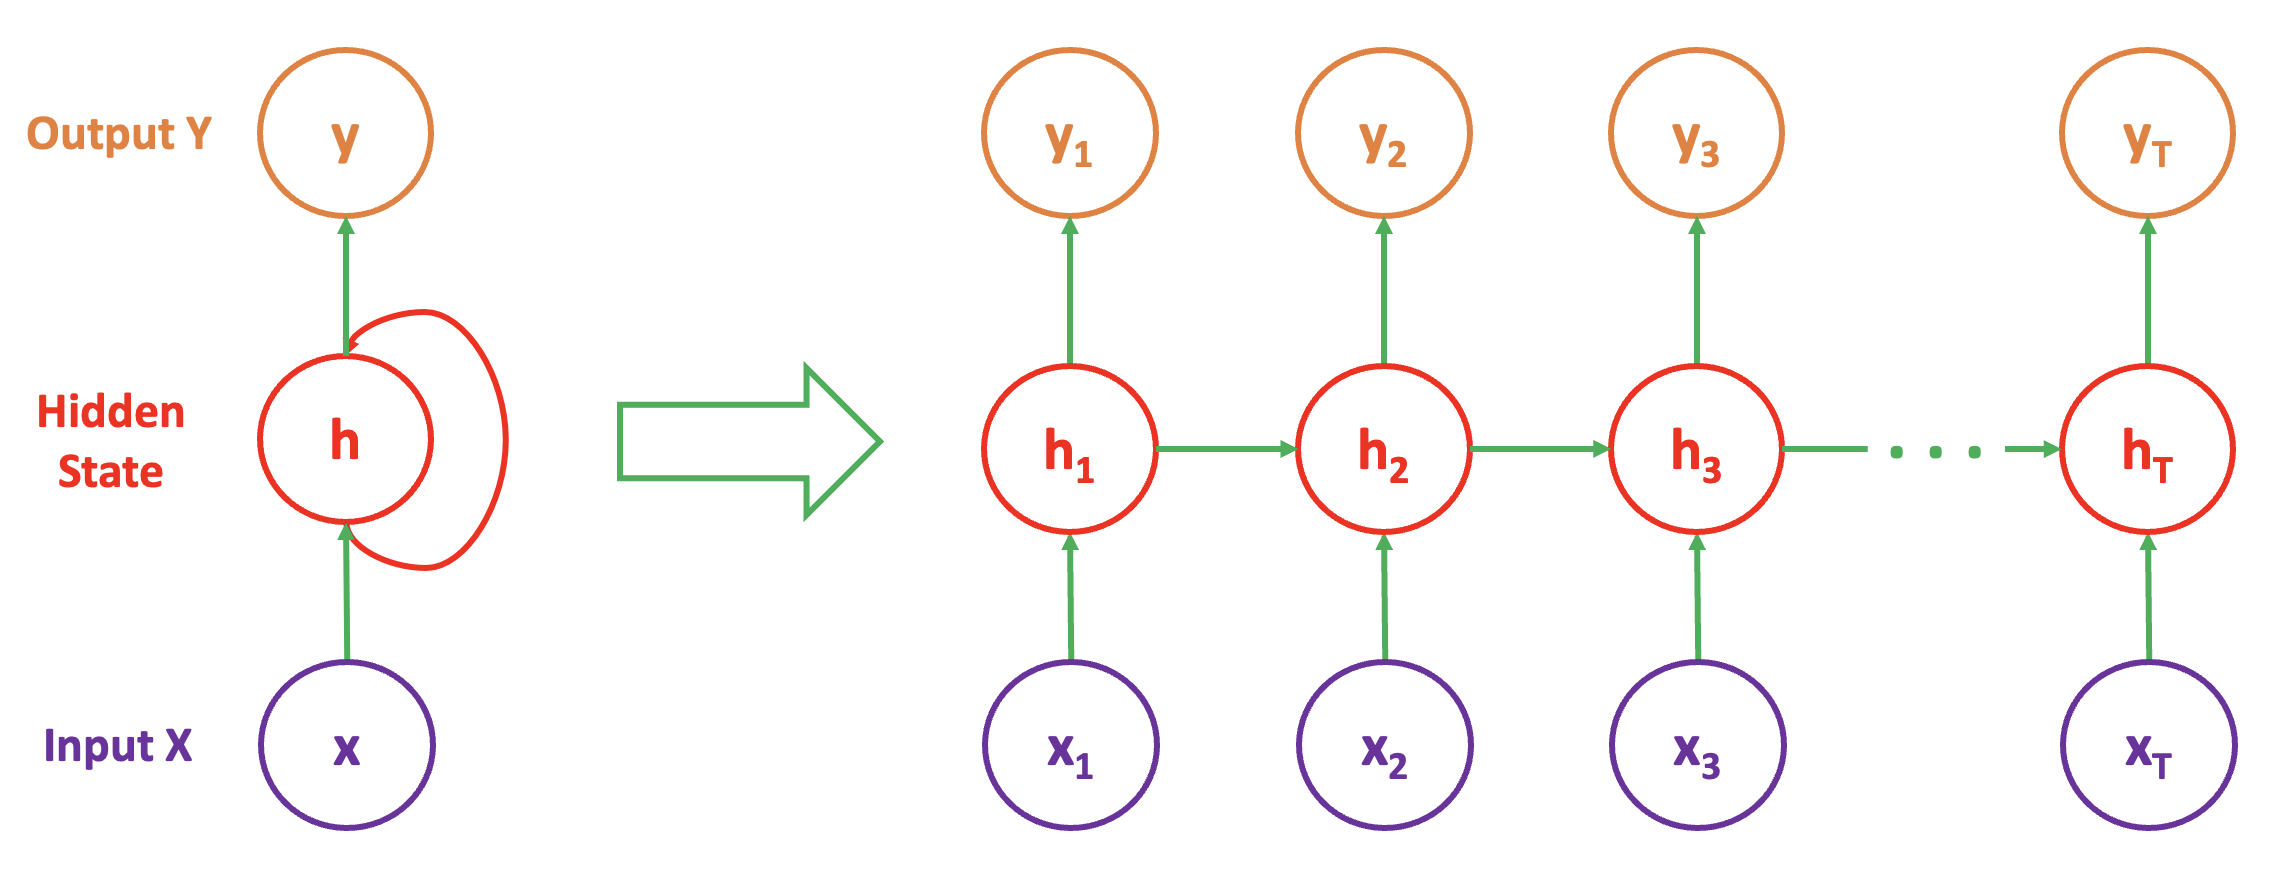

Các thành phần chính của một mạng RNN bao gồm:
* **Node input:** Nhận vào token thứ t của dữ liệu X đầu vào.
* **Node hidden state:** Nơi "lưu trữ" các thông tin ghi nhận được qua từng thời điểm t trong chuỗi dữ liệu đầu vào. Chi tiết các bước tính toán bên trong hidden state được miêu tả rõ hơn ở hình 1.
* **Node output:** Trả về output của mạng RNN tại thời điểm thứ t.

Như vậy, thông qua việc duyệt qua mỗi thời điểm thứ t trong chuỗi dữ liệu, các node nêu trên sẽ được cập nhật giá trị mới (unrolled) liên tục cho đến khi đến điểm kết thúc của chuỗi.

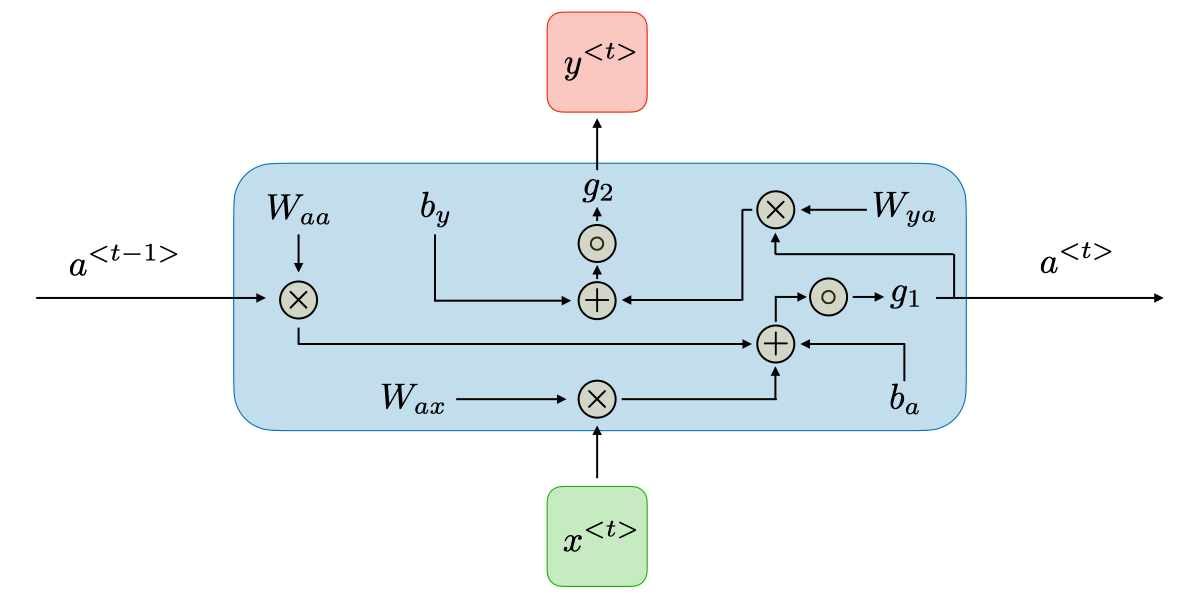

Lưu ý rằng, các trọng số $W_{aa}$, $W_{ax}$ và $W_{ya}$ sẽ được sử dụng chung (tức sẽ được cập nhật giá trị) xuyên suốt trong quá trình tính toán từ thời điểm $t = 0$ đến $t = T$.

## **Long Short Term Memory**

**Long Short-Term Memory (LSTM)** là một mô hình mạng nơ-ron thuộc họ RNN, đây là một phiên bản cải tiến so với kiến trúc RNN truyền thống bằng việc khắc phục phần nào tình trạng vanishing gradient xảy ra khi phải xử lý các dữ liệu có chuỗi dài. Về cơ bản, sự thay đổi lớn nhất của LSTM so với RNN đến từ các bước tính toán bên trong một hidden state như hình dưới đây:

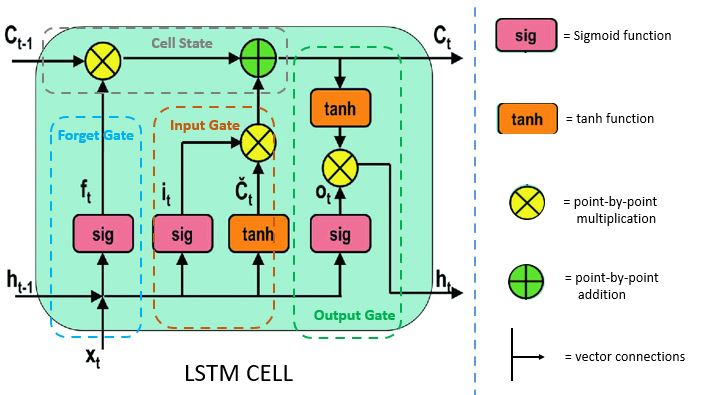

LSTM sử dụng cơ chế cổng (gate) để điều phối lưu lượng thông tin xuyên suốt các thời điểm t trong chuỗi dữ liệu.
* **Forget gate:** Cổng này có nhiệm vụ quyết định nên giữ lại hay bỏ đi một số những thông tin tiếp nhận được từ hidden state của thời điểm t − 1 trước đó.
* **Input gate:** Cổng này dùng để cập nhật thông tin nhận được tại input thứ t hiện tại kết hợp với thông tin nhận được từ hidden state thứ t − 1.
* **Output gate:** Cổng này dùng để quyết định thông tin về hidden state đầu vào cho việc tính toán thứ t + 1, đồng thời còn sử dụng để tính output của **LSTM** tại thời điểm t. Output gate được tính thông qua việc sử dụng hidden state t − 1, input $x^t$ và **cell states**.

# **Phần II: Sentiment Analysis for Finalcial News**

Trong bài tập này, chúng ta sẽ xây dựng một mô hình về Text Classfication dùng để phân loại tình hình tin tức tài chính là tích cực (positive), tiêu cực (negative) hay trung lập (neutral) dựa trên một đoạn văn có nội dung về tài chính cho trước. Các bạn sẽ thực hiện theo hướng dẫn sau:

## **1. Tải bộ dữ liệu:**

Các bạn tải bộ dữ liệu tại [đây](https://drive.google.com/file/d/1o09HEkDBBEjsW3gN76vDYfCAKiCqpcpg/view). Ở đây, ta sẽ chỉ quan tâm đến file **all_data.csv**. Dưới đây là thông tin 4 hàng đầu tiên của bảng dữ liệu:
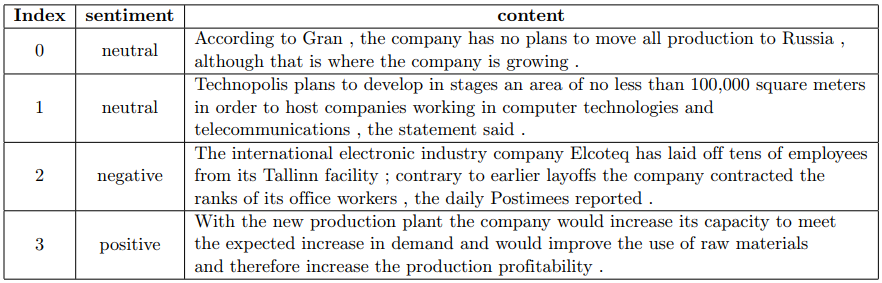

Dựa vào bảng dữ liệu trên, ta xác định được rằng mô hình ta xây dựng sẽ sử dụng thông tin từ cột **content** để dữ đoán nhãn tại cột **sentiment**.

## **2. Chuẩn bị dữ liệu**

Để sử dụng dữ liệu từ file .csv đưa vào tensorflow phục vụ cho việc huấn luyện một cách hiệu quả, ta sẽ chuyển đổi thành các **tf.data.dataset.** Một phương pháp nhanh chóng để thực hiện điều này đó là sử dụng hàm **tf.keras.utils.text_dataset_from_directory** (các bạn đọc thêm về hàm này tại [đây](https://www.tensorflow.org/api_docs/python/tf/keras/utils/text_dataset_from_directory)). Dựa vào chú thích được ghi trong trang tài liệu của tensorflow, để sử dụng hàm này, ta cần đưa dữ liệu hiện tại về cấu trúc thư mục như sau:

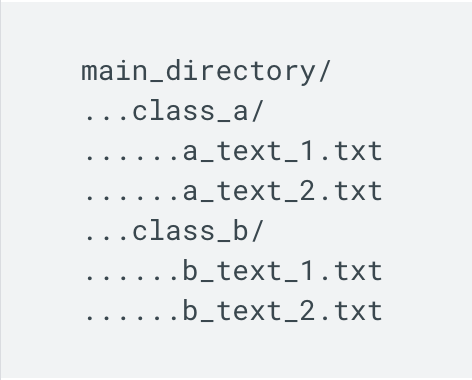

Các bước xử lý để tạo ra được cấu trúc thư mục trên ta thực hiện như sau:

### **(a) Đọc dữ liệu từ file .csv:**

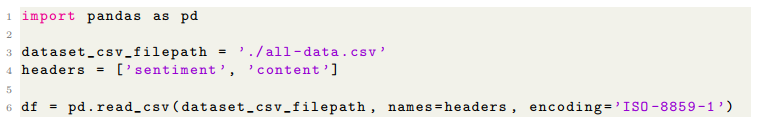

Ta có thể dễ dàng trích xuất thông tin về tên gọi cũng như số lượng của các class từ DataFrame thông qua đoạn code sau:

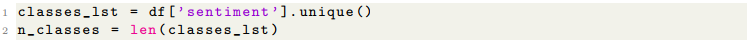

Từ đây, có thể xác định được rằng ta sẽ có 1 thư mục lớn làm thư mục chính (tương ứng sẽ có 3 thư mục dành cho train, val, test), bên trong sẽ có thêm 3 thư mục con tương ứng với 3 class của bài toán lần lượt là **Positive, Negative và Neutral**.





### **(b) Chuẩn hoá dữ liệu:**

Đối với dữ liệu text, việc chuẩn hóa dữ liệu có thể thực hiện đơn giản thông qua việc khởi tạo 1 hàm chuẩn hóa, sau đó sử dụng phương thức **map()** của DataFrame để áp dụng trực tiếp hàm tiền xử lý dựa trên các giá trị của cột được chỉ định:
* Định nghĩa hàm chuẩn hóa, nhận tham số đầu vào là 1 text và trả về 1 text đã được chuẩn hóa:

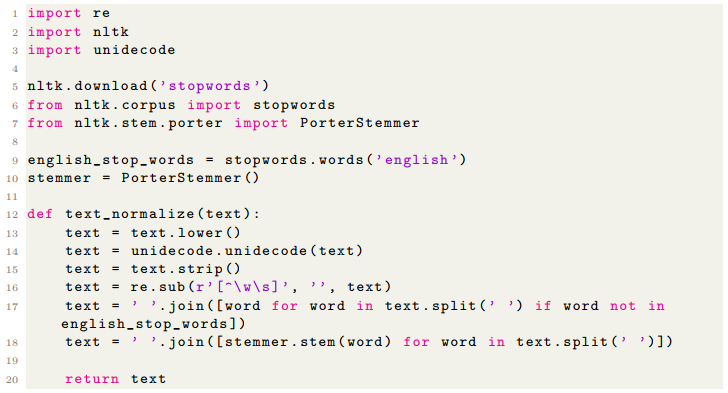

Các kỹ thuật chuẩn hóa được áp dụng trong bài bao gồm: Chuyển chữ viết thường (***Lowercasing***), Xóa dấu câu (***Punctuation Removal***), Xóa stopwords (***Stopwords Removal***), ***Stemming***.

* Áp dụng hàm chuẩn hóa vào cột **content** trong DataFrame:

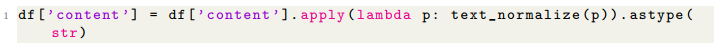

### **(c) Chia DataFrame train/val/test:** 

Để tiện lợi trong việc tạo các folder, ta dùng hàm train_test_split của thư viện scikit-learn để chia trước bộ dữ liệu thành 3 bộ train/val/test trên DataFrame gốc.

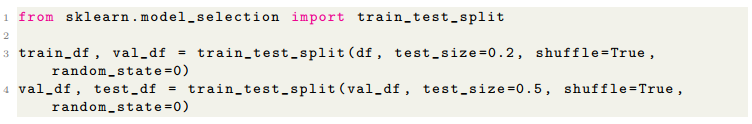

Tỉ lệ chia bộ dữ liệu được áp dụng là 8/1/1 (tương ứng với train/val/test).



### **(d) Tạo cấu trúc cây thư mục dataset:**

Với các thành phần có được ở những bước trên, ta sẽ tiến hành xây dựng folder dataset theo định dạng được yêu cầu, các bước thực hiện như sau:
* **Tạo thư mục dataset root:** Thư mục này dùng để chứa 3 thư mục train, val, test. Việc này giúp cho khu vực lưu dataset trở nên gọn gàng và dễ tiếp cận hơn.

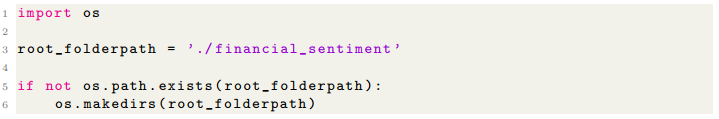

* **Tạo thư mục cho train, val, test:** Ta lần lượt tạo 3 thư mục để chứ dữ liệu train, val, test đã chia (Lưu ý: code từ đây sẽ làm mẫu với tập train, các bạn làm tương tự cho 2 bộ còn lại):

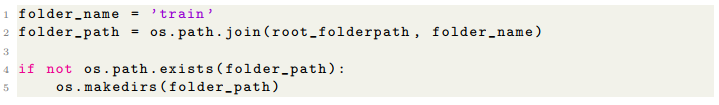

* **Tạo thư mục cho từng class:** Bên trong thư mục train/val/test, ta sẽ tạo thư mục cho từng class:

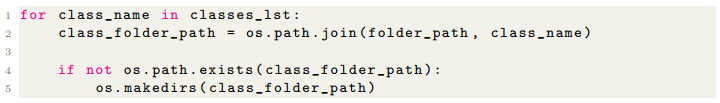

* **Tạo mẫu dữ liệu:** Cuối cùng, ta đưa các mẫu dữ liệu (cột content) từ file .csv thành file .txt, các file .txt này cần được đặt vào đúng thư mục class mà mẫu dữ liệu được gán nhãn (cột **sentiment**).

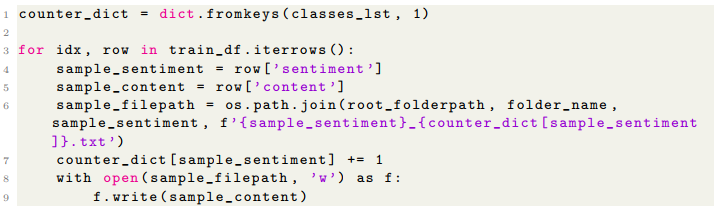


### **(e) Tạo các tf.data.Dataset:**

Với thư mục dataset đã tạo (đầy đủ train/val/test), ta tiến hành
sử dụng hàm **tf.keras.utils.text_dataset_from_directory** để khởi tạo các **tf.data.Dataset**:

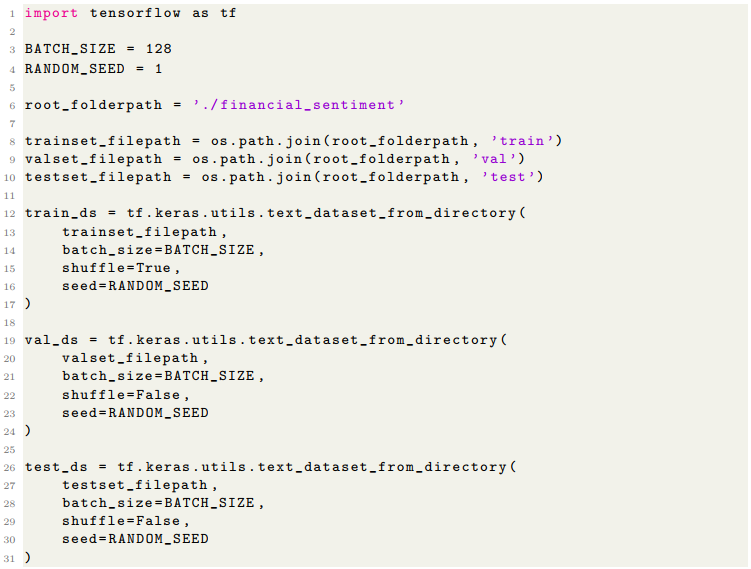

## **3. Xây dựng mô hình**

Các bạn sẽ xây dựng mô hình theo kiến trúc được mô tả như sau (danh
sách dưới đây mô tả theo thứ tự trong **tf.keras.Sequential**):

* Input layer: Nhận vào một vector với kiểu dữ liệu là ‘string‘. (Shape = (1,)).
* Text vectorization layer: Từ chuỗi đầu vào, thực hiện vector hóa văn bản sử dụng layer tf.keras.layers.TextVectorization (các bạn đọc thêm về hàm này tại đây) được định nghĩa bên ngoài hàm như sau:

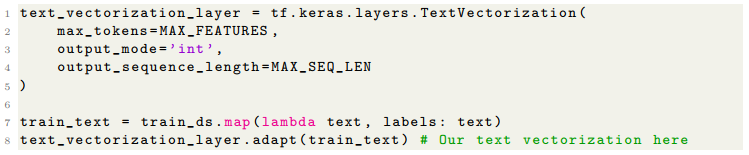

  * Trong đó:
    * **MAX_FEATURES:** Tổng số lượng từ sẽ biểu diễn trong bộ từ vựng (mặc định chọn là 5000).
    * **MAX_SEQ_LEN:** Tổng số token biểu diễn cho 1 câu (mặc định chọn là 128).

* **Embedding layer:** Từ vector output của text vectorization layer, ta đưa vào layer embedding. Chức năng chính của layer này là để biểu diễn các phần tử số nguyên trong vector đầu vào thành các vector với cùng chiều dài (**embedding dims**).

* **RNN Layer 1:** Từ vector output của embedding layer, ta đưa vào layer RNN đầu tiên với **32 units**. Lưu ý rằng cần phải trả về vector output của toàn bộ timestep tại layer này để có thể làm input của layer RNN tiếp theo.

* **RNN Layer 2:** Layer RNN cuối cùng với **32 units**, với layer này ta sẽ chỉ trả về vector output tại timestep cuối cùng.

* **Fully-connected layer:** Từ vector output của RNN layer cuối cùng, ta đưa vào một lớp fully-connected layer với **16 node** với activation function là **‘relu‘**.

* **Output layer:** Fully-connected layer với **3 nodes** (tượng trưng cho 3 class) và activation function là **‘softmax‘**.

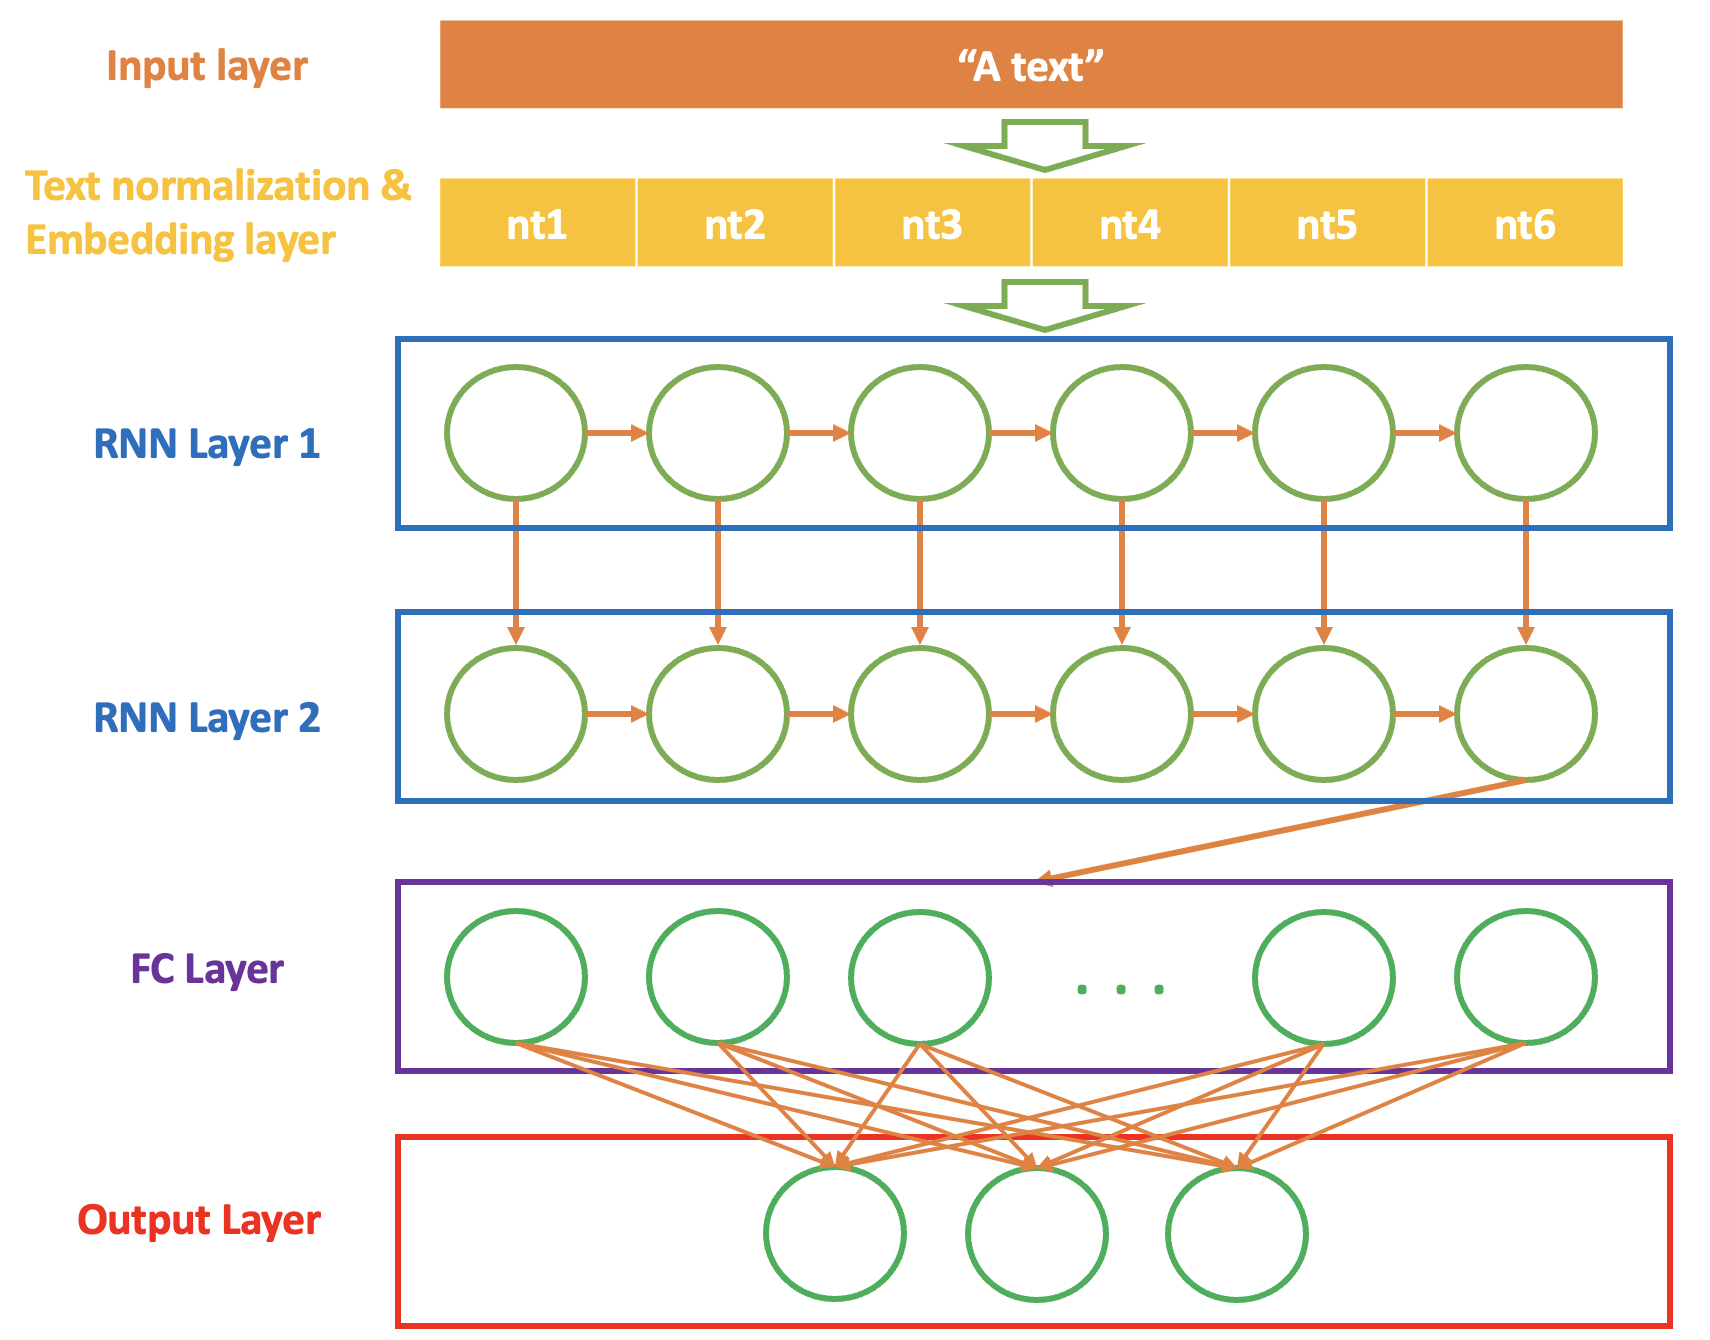

Sau khi xây dựng xong hàm này, thực hiện lời gọi hàm với tên biến là **model**.
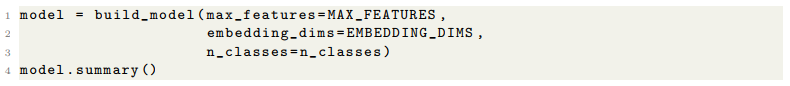


## **4. Cài đặt các tham số khác cho mô hình:** 

Sau khi có mô hình, ta cần cấu hình thêm một số thông tin cơ bản khác cho model bao gồm hàm loss, thuật toán tối ưu, độ đo đánh giá... Các bạn sẽ chỉnh theo danh sách như sau:
* **Loss function:** SparseCategoricalCrossentropy.
* **Optimizer:** Adam.
* **Metrics:** Accuracy.

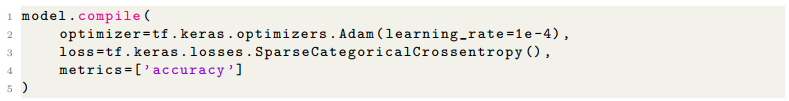

## **5. Thực hiện huấn luyện**

Thực hiện huấn luyện mô hình trên dữ liệu train và đánh giá trên tập val.

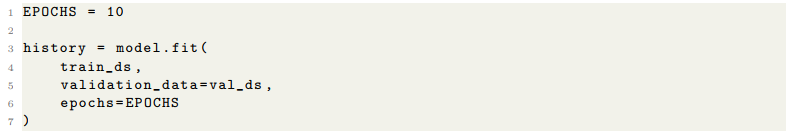

## **6. Đánh giá và trực quan hoá**

Với mô hình đã huấn luyện xong, ta có thể thực hiện:
* **Đánh giá trên tập dữ liệu test:** Bên cạnh bộ val, ta sẽ đánh giá mô hình thêm 1 lần nữa trên tập test.

image.png

Sau khi chạy lệnh trên, kết quả sẽ được hiện ra thông qua các độ đo đánh giá (loss, accuracy)

* **Trực quan hóa kết quả huấn luyện:** Ta có thể trực quan hiệu năng của mô hình trong quá trình học thông qua việc vẽ đồ thị loss và accuracy trên tập train và val trong quá trình huấn luyện.

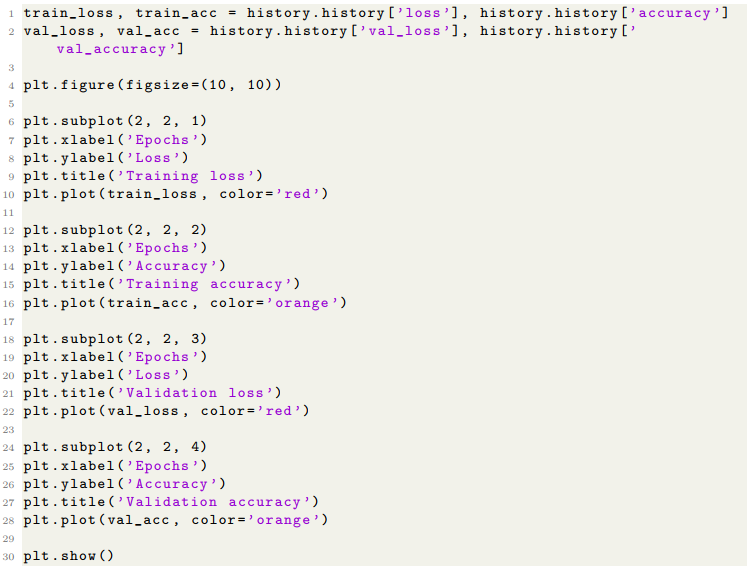



## **IMPLEMENT**

In [ ]:
!gdown --id 1o09HEkDBBEjsW3gN76vDYfCAKiCqpcpg

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1o09HEkDBBEjsW3gN76vDYfCAKiCqpcpg
To: /content/financial_sentiment.zip
100% 925k/925k [00:00<00:00, 121MB/s]


In [ ]:
!unzip './financial_sentiment.zip'

Archive:  ./financial_sentiment.zip
  inflating: FinancialPhraseBank/License.txt  
  inflating: FinancialPhraseBank/README.txt  
  inflating: FinancialPhraseBank/Sentences_50Agree.txt  
  inflating: FinancialPhraseBank/Sentences_66Agree.txt  
  inflating: FinancialPhraseBank/Sentences_75Agree.txt  
  inflating: FinancialPhraseBank/Sentences_AllAgree.txt  
  inflating: all-data.csv            


In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 6.2 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import nltk
import unidecode

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1
tf.random.set_seed(RANDOM_SEED)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
english_stop_words = stopwords.words('english')
stemmer = PorterStemmer()

def text_normalize(text):
    text = text.lower() # Chuyển chữ viết thường 
    text = unidecode.unidecode(text) # Mã hóa về ASCII
    text = text.strip() # Xóa kí tự đặc biệt ở đầu và cuối string
    text = re.sub(r'[^\w\s]', '', text) # Loại bỏ dấu câu
    text = ' '.join([word for word in text.split(' ') if word not in english_stop_words]) # Xóa stopwords
    text = ' '.join([stemmer.stem(word) for word in text.split(' ')]) # Stemming
 
    return text

In [ ]:
DATASET_CSV_FILEPATH = './all-data.csv'
headers = ['sentiment', 'content']

df = pd.read_csv(DATASET_CSV_FILEPATH, names= headers, encoding='ISO-8859-1')
df['content'] = df['content'].apply(lambda p: text_normalize(p)).astype(str)
classes_lst = df['sentiment'].unique() # Danh sách tên các class trong dataset
n_classes = len(classes_lst) # Tìm số lượng class trong bộ dữ liệu

# Chia bộ dữ liệu thành 3 bộ train, val, test
train_df, val_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=0) 
val_df, test_df = train_test_split(val_df, test_size=0.5, shuffle=True, random_state=0)

In [ ]:
ROOT_FOLDERPATH = './financial_sentiment' # Khai báo đường dẫn đến folder root chứa dataset

# Khởi tạo folder root của dataset nếu chưa tồn tại trong disk
if not os.path.exists(ROOT_FOLDERPATH):
    os.makedirs(ROOT_FOLDERPATH)

for folder_name in ['train', 'val', 'test']:
    # Khai báo đường dẫn đến folder 
    folder_path = os.path.join(ROOT_FOLDERPATH, folder_name)

    # Tạo folder nếu chưa tồn tại trong disk
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    for class_name in classes_lst:
        # Khai báo đường dẫn đến folder của class 
        class_folder_path = os.path.join(folder_path, class_name) 

        # Tạo folder nếu chưa tồn tại trong disk
        if not os.path.exists(class_folder_path):
            os.makedirs(class_folder_path)       

    if folder_name == 'train':
        df = train_df
    elif folder_name == 'val':
        df = val_df
    else:
        df = test_df

    # Tạo bộ đếm số lượng sample cho từng class (dùng để đặt tên file .txt cho sample)
    counter_dict = dict.fromkeys(classes_lst, 1) 

    # Tạo các data sample dưới dạng các file .txt
    for idx, row in df.iterrows(): # Duyệt qua từng hàng trong file .csv của tập train
        sample_sentiment = row['sentiment'] # Lấy label của sample
        sample_content = row['content'] # Lấy nội dung văn bản của sample
        sample_filepath = os.path.join(ROOT_FOLDERPATH, folder_name, sample_sentiment, f'{sample_sentiment}_{counter_dict[sample_sentiment]}.txt') # Khai báo đường dẫn lưu file .txt
        counter_dict[sample_sentiment] += 1 
        # Tạo file .txt với nội dung là ô content trong file .csv của hàng đang xét
        with open(sample_filepath, 'w') as f: 
            f.write(sample_content)        

In [ ]:
BATCH_SIZE = 128
MAX_SEQ_LEN = 128
MAX_FEATURES = 5000 # vocab size
EMBEDDING_DIMS = 64

ROOT_FOLDERPATH = './financial_sentiment'

trainset_filepath = os.path.join(ROOT_FOLDERPATH, 'train') 
valset_filepath = os.path.join(ROOT_FOLDERPATH, 'val') 
testset_filepath = os.path.join(ROOT_FOLDERPATH, 'test') 

train_ds = tf.keras.utils.text_dataset_from_directory(
    trainset_filepath, # Đường dẫn đến bộ train
    batch_size=BATCH_SIZE, # Cài đặt batch size
    shuffle=True, # Bật chế độ shuffle dataset
    seed=RANDOM_SEED # Cài đặt random seed cho các phép transform (nếu có)
)

val_ds = tf.keras.utils.text_dataset_from_directory(
    valset_filepath, # Đường dẫn đến bộ val
    batch_size=BATCH_SIZE, # Cài đặt batch size
    shuffle=False, # Bật chế độ shuffle dataset
    seed=RANDOM_SEED # Cài đặt random seed cho các phép transform (nếu có)
)

test_ds = tf.keras.utils.text_dataset_from_directory(
    testset_filepath, # Đường dẫn đến bộ val
    batch_size=BATCH_SIZE, # Cài đặt batch size
    shuffle=False, # Bật chế độ shuffle dataset
    seed=RANDOM_SEED # Cài đặt random seed cho các phép transform (nếu có)
)

Found 3876 files belonging to 3 classes.
Found 485 files belonging to 3 classes.
Found 485 files belonging to 3 classes.


In [ ]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(10):
    print("Text: ", text_batch.numpy()[i])
    print("Label:", label_batch.numpy()[i])

Text:  b'2008  steel industri account 64 percent cargo volum transport  wherea energi industri account 28 percent industri 8 percent '
Label: 1
Text:  b'upmkymmen gener seventeen consecut quarter posit cash flow oper '
Label: 2
Text:  b'chang announc today effect close trade friday  june 19  2009 '
Label: 1
Text:  b'studi expect provid proof pharmacodynam activ human  corrobor safeti profil establish dose rang therapeut studi '
Label: 1
Text:  b'take cue playbook east dillon lion  creat special team heavyhit style player  bootcut jean  tummi top  cours  cowboy boot '
Label: 1
Text:  b' tom dore long success career drive busi  know american market '
Label: 1
Text:  b'accord sweden minist local govern financi market  mat odel  decis sell state share telecom group teliasonera carri cooper state finland '
Label: 1
Text:  b'network test busi part elektrobit test autom busi segment employ 39 peopl finland 22 peopl abroad  mainli us asia '
Label: 1
Text:  b'master busi administr mba '
Label: 

In [ ]:
# Cấu hình các tham số tối ưu cho việc đọc dữ liệu
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### **1. RNN model**

In [ ]:
# Khai báo layer text vectorization
text_vectorization_layer = tf.keras.layers.TextVectorization(
    max_tokens=MAX_FEATURES, # Kích thước bộ từ vựng
    output_mode='int', # Giá trị token là chỉ mục của từ trong vocab
    output_sequence_length=MAX_SEQ_LEN # Số token tối đa trong 1 vector
)

train_text = train_ds.map(lambda text, labels: text) # Gọi `content` của toàn bộ mẫu dữ liệu trong tập train
text_vectorization_layer.adapt(train_text) # Xây dựng layer vectorization dựa trên dữ liệu tập train

In [ ]:
# # Xây dựng hàm khởi tạo model
# def build_model_RNN(max_features, embedding_dims, n_classes):
#     model = tf.keras.Sequential([
#         # Nhận vào 1 string
#         tf.keras.Input(shape=(1,), dtype='string', name='input_layer'),

#         #Thực hiện Text Vectorization Layer
#         text_vectorization_layer,

#         #Tạo Embedding Layer (chuyển đổi các token thành vector)
#         tf.keras.layers.Embedding(input_dim=max_features + 1,
#                                   output_dim=embedding_dims,
#                                   embeddings_initializer=tf.random_uniform_initializer(seed=RANDOM_SEED),
#                                   mask_zero=True,
#                                   name='embedding_layer'),
                                 
#         # RNN Layer 1                                           
#         tf.keras.layers.SimpleRNN(32, 
#                                   return_sequences= True,
#                                   kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
#                                   name='rnn_layer_1'),

#         # RNN Layer 2                                              
#         tf.keras.layers.SimpleRNN(32,
#                                   return_sequences= False,
#                                   kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
#                                   name='rnn_layer_2'),
#         #Fully-connected Layer 1
#         tf.keras.layers.Dense(16,
#                               activation='relu',
#                               kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
#                               name='fl_layer_1'),

#         #Output Layer
#         tf.keras.layers.Dense(n_classes,
#                               activation='softmax',
#                               kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
#                               name='output_layer')
#     ], name= 'rnn_model')

#     return model

# model = build_model_RNN(max_features= MAX_FEATURES,
#                     embedding_dims=EMBEDDING_DIMS,
#                     n_classes=n_classes)

# model.summary()

### **2. LSTM model**

In [ ]:
# Xây dựng hàm khởi tạo model
def build_model_LSTM(max_features, embedding_dims, n_classes):
    model = tf.keras.Sequential([
        # Nhận vào 1 string
        tf.keras.Input(shape=(1,), dtype='string', name='input_layer'),

        #Thực hiện Text Vectorization Layer
        text_vectorization_layer,

        #Tạo Embedding Layer (chuyển đổi các token thành vector)
        tf.keras.layers.Embedding(input_dim=max_features + 1,
                                  output_dim=embedding_dims,
                                  embeddings_initializer=tf.random_uniform_initializer(seed=RANDOM_SEED),
                                  mask_zero=True,
                                  name='embedding_layer'),
                                 
        # LSTM Layer 1                                           
        tf.keras.layers.LSTM(32, 
                                  return_sequences= True,
                                  kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
                                  name='lstm_layer_1'),

        # LSTM Layer 2                                              
        tf.keras.layers.LSTM(32,
                                  return_sequences= False,
                                  kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
                                  name='lstm_layer_2'),
        #Fully-connected Layer 1
        tf.keras.layers.Dense(16,
                              activation='relu',
                              kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
                              name='fl_layer_1'),

        #Output Layer
        tf.keras.layers.Dense(n_classes,
                              activation='softmax',
                              kernel_initializer=tf.initializers.GlorotUniform(seed=RANDOM_SEED),
                              name='output_layer')
    ], name= 'lstm_model')

    return model

In [ ]:
model = build_model_LSTM(max_features= MAX_FEATURES,
                    embedding_dims=EMBEDDING_DIMS,
                    n_classes=n_classes)

model.summary()

Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 128)              0         
 torization)                                                     
                                                                 
 embedding_layer (Embedding)  (None, 128, 64)          320064    
                                                                 
 lstm_layer_1 (LSTM)         (None, 128, 32)           12416     
                                                                 
 lstm_layer_2 (LSTM)         (None, 32)                8320      
                                                                 
 fl_layer_1 (Dense)          (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 3)                 51        
                                                        

In [ ]:
# Khai báo một số giá trị siêu tham số
EPOCHS = 10
LR = 1e-4

In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đo đánh giá Accuracy
)

In [ ]:
# Thực hiện huấn luyện
history = model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = số epochs
)

Epoch 1/10
31/31 [==============================] - 26s 518ms/step - loss: 1.0913 - accuracy: 0.5728 - val_loss: 1.0815 - val_accuracy: 0.5835
Epoch 2/10
31/31 [==============================] - 18s 590ms/step - loss: 1.0702 - accuracy: 0.5944 - val_loss: 1.0548 - val_accuracy: 0.5835
Epoch 3/10
31/31 [==============================] - 17s 530ms/step - loss: 1.0349 - accuracy: 0.5944 - val_loss: 1.0063 - val_accuracy: 0.5835
Epoch 4/10
31/31 [==============================] - 9s 278ms/step - loss: 0.9759 - accuracy: 0.5944 - val_loss: 0.9466 - val_accuracy: 0.5835
Epoch 5/10
31/31 [==============================] - 9s 278ms/step - loss: 0.9232 - accuracy: 0.5944 - val_loss: 0.9129 - val_accuracy: 0.5835
Epoch 6/10
31/31 [==============================] - 9s 278ms/step - loss: 0.8841 - accuracy: 0.6040 - val_loss: 0.8823 - val_accuracy: 0.6021
Epoch 7/10
31/31 [==============================] - 9s 278ms/step - loss: 0.8481 - accuracy: 0.6236 - val_loss: 0.8558 - val_accuracy: 0.6247
Epo

In [ ]:
# Đánh giá mô hình trên tập test
test_evaluation = model.evaluate(test_ds)

4/4 [==============================] - 0s 104ms/step - loss: 0.8177 - accuracy: 0.6598


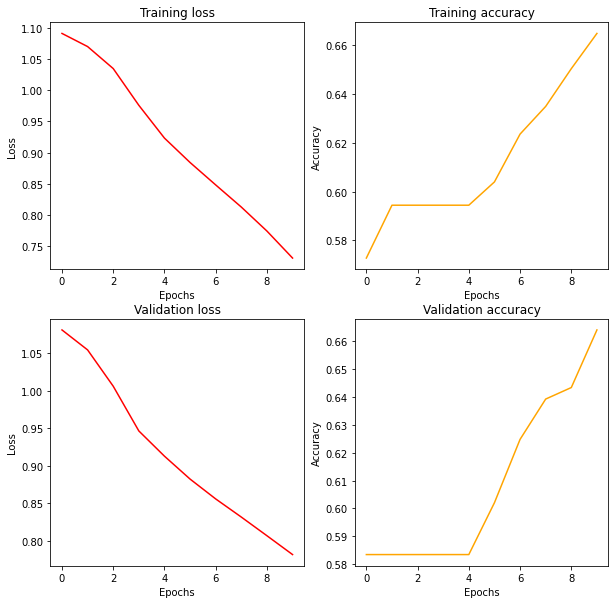

In [ ]:
# Đọc các kết quả huấn luyện mô hình qua từng epoch
train_loss, train_acc = history.history['loss'], history.history['accuracy'] # Đọc thông tin loss, acc trên tập train
val_loss, val_acc = history.history['val_loss'], history.history['val_accuracy'] # Đọc thông tin loss, acc trên tập val

plt.figure(figsize=(10, 10)) # Cài đặt kích thước khung ảnh

plt.subplot(2, 2, 1) # Khởi tạo khung ảnh cho training loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Training loss') # Hiển thị title của khung ảnh hiện tại là 'Training Loss'
plt.plot(train_loss, color='red') # Vẽ đường giá trị loss trên tập train qua từng epoch (đường vẽ màu đỏ)

plt.subplot(2, 2, 2) # Khởi tạo khung ảnh cho training acc
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Accuracy') # Hiển thị tên trục tung là 'Accuracy'
plt.title('Training accuracy') # Hiển thị title của khung ảnh hiện tại là 'Training accuracy'
plt.plot(train_acc, color='orange') # Vẽ đường giá trị accuracy trên tập train qua từng epoch (đường vẽ màu cam)

plt.subplot(2, 2, 3) # Khởi tạo khung ảnh cho val loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Validation loss') # Hiển thị title của khung ảnh hiện tại là 'Validation loss'
plt.plot(val_loss, color='red') # Vẽ đường giá trị loss trên tập val qua từng epoch (đường vẽ màu đỏ)

plt.subplot(2, 2, 4) # Khởi tạo khung ảnh cho val acc
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Accuracy') # Hiển thị tên trục tung là 'Accuracy'
plt.title('Validation accuracy') # Hiển thị title của khung ảnh hiện tại là 'Validation accuracy'
plt.plot(val_acc, color='orange') # Vẽ đường giá trị accuracy trên tập val qua từng epoch (đường vẽ màu cam)

plt.show() # Hiển thị 4 khung ảnh nhỏ